<a href="https://colab.research.google.com/github/Annie-blare/WSL_LAB/blob/main/Copy_of_Maize_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjusted to the correct file path
data = pd.read_csv(file_path)

# Selecting the 'TotalNPK' and 'Maize_Production' columns
X = data[['TotalNPK']]
y = data['Maize_Production']

# Performing linear regression
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# Extracting 'TotalNPK' for Bengaluru
bengaluru_totalnpk = data.loc[data['District'] == 'BENGALURU', 'TotalNPK'].iloc[0]

# User provided perturbations in percentages
user_perturbations = [10, -10, -20, 20]
# Converting percentages to fractions
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Calculating 'Maize_Production(old)' for Bengaluru
maize_production_old = data.loc[data['District'] == 'BENGALURU', 'Maize_Production'].iloc[0]

# Min-max normalization for 'Maize_Production(old)'
maize_production_min = y.min()
maize_production_max = y.max()
normalized_maize_production_old = (maize_production_old - maize_production_min) / (maize_production_max - maize_production_min)

# Applying corrected perturbations and calculating new values
results_corrected = []
for p in perturbations_corrected:
    perturbed_totalnpk = bengaluru_totalnpk * (1 + p)
    maize_production_new = m * perturbed_totalnpk + c
    normalized_maize_production_new = (maize_production_new - maize_production_min) / (maize_production_max - maize_production_min)
    change_in_maize_production = maize_production_new - maize_production_old
    impact = normalized_maize_production_new - normalized_maize_production_old

    results_corrected.append({
        'Perturbation': f'P{user_perturbations.index(p*100)+1}',
        'Magnitude (%)': p*100,
        'Maize_Production(old)': maize_production_old,
        'Normalized_Maize_Production(old)': normalized_maize_production_old,
        'Maize_Production(new)': maize_production_new,
        'Normalized_Maize_Production(new)': normalized_maize_production_new,
        'Change_in_Maize_Production': change_in_maize_production,
        'Impact': impact
    })

results_df_corrected = pd.DataFrame(results_corrected)
print(results_df_corrected)


  Perturbation  Magnitude (%)  Maize_Production(old)  \
0           P1           10.0                   2879   
1           P2          -10.0                   2879   
2           P3          -20.0                   2879   
3           P4           20.0                   2879   

   Normalized_Maize_Production(old)  Maize_Production(new)  \
0                          0.004851           66324.632613   
1                          0.004851           54367.859761   
2                          0.004851           48389.473335   
3                          0.004851           72303.019039   

   Normalized_Maize_Production(new)  Change_in_Maize_Production    Impact  
0                          0.111743                63445.632613  0.106893  
1                          0.091599                51488.859761  0.086748  
2                          0.081526                45510.473335  0.076676  
3                          0.121816                69424.019039  0.116965  


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjusted to the correct file path
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['Maize_Production']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [10, -10, -20, 20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'Maize_Production'
maize_production_min = y.min()
maize_production_max = y.max()

# Loop through each unique district in the dataset
for district in data['District'].unique():
    # Extracting 'TotalNPK' and 'Maize_Production' for the current district
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    maize_production_old = data.loc[data['District'] == district, 'Maize_Production'].iloc[0]
    normalized_maize_production_old = (maize_production_old - maize_production_min) / (maize_production_max - maize_production_min)

    district_results = []

    # Applying perturbations and calculating new values for each perturbation
    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        maize_production_new = m * perturbed_totalnpk + c
        normalized_maize_production_new = (maize_production_new - maize_production_min) / (maize_production_max - maize_production_min)
        change_in_maize_production = maize_production_new - maize_production_old
        impact = normalized_maize_production_new - normalized_maize_production_old

        district_results.append({
            'Perturbation (%)': p * 100,
            'Maize_Production(old)': maize_production_old,
            'Normalized_Maize_Production(old)': normalized_maize_production_old,
            'Maize_Production(new)': maize_production_new,
            'Normalized_Maize_Production(new)': normalized_maize_production_new,
            'Change_in_Maize_Production': change_in_maize_production,
            'Impact': impact
        })

    # Convert the district results into a DataFrame and print it
    district_df = pd.DataFrame(district_results)
    print(f"Results for {district}:")
    print(district_df)
    print("\n")  # Add a newline for better readability between districts


Results for BENGALURU:
   Perturbation (%)  Maize_Production(old)  Normalized_Maize_Production(old)  \
0              10.0                   2879                          0.004851   
1             -10.0                   2879                          0.004851   
2             -20.0                   2879                          0.004851   
3              20.0                   2879                          0.004851   

   Maize_Production(new)  Normalized_Maize_Production(new)  \
0           66324.632613                          0.111743   
1           54367.859761                          0.091599   
2           48389.473335                          0.081526   
3           72303.019039                          0.121816   

   Change_in_Maize_Production    Impact  
0                63445.632613  0.106893  
1                51488.859761  0.086748  
2                45510.473335  0.076676  
3                69424.019039  0.116965  


Results for BENGALURU(R):
   Perturbation (%)  Maize_

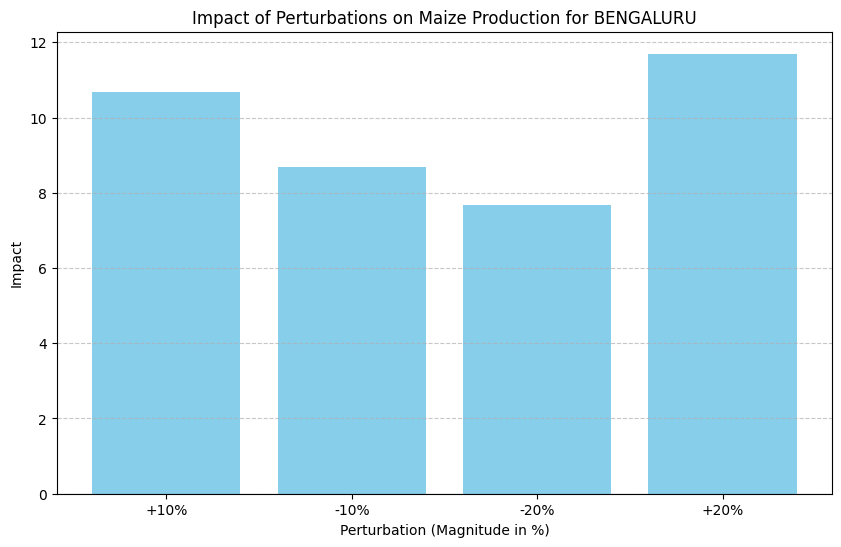

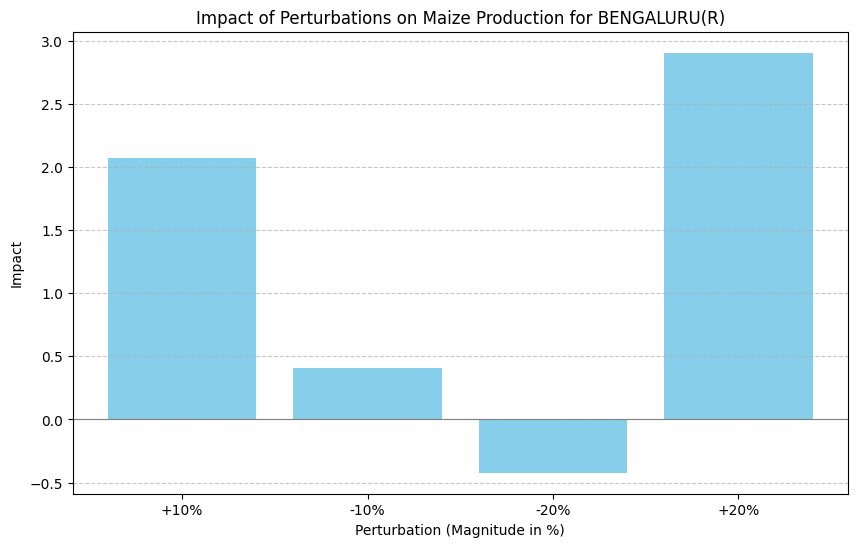

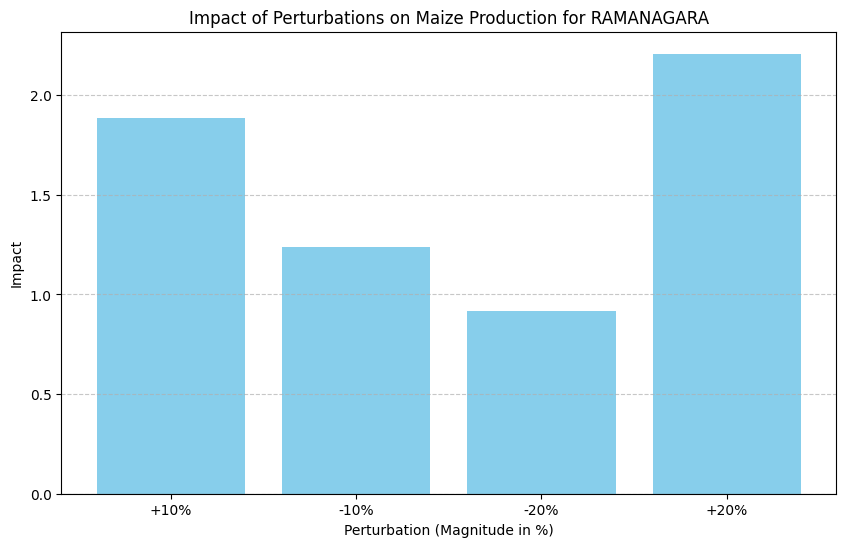

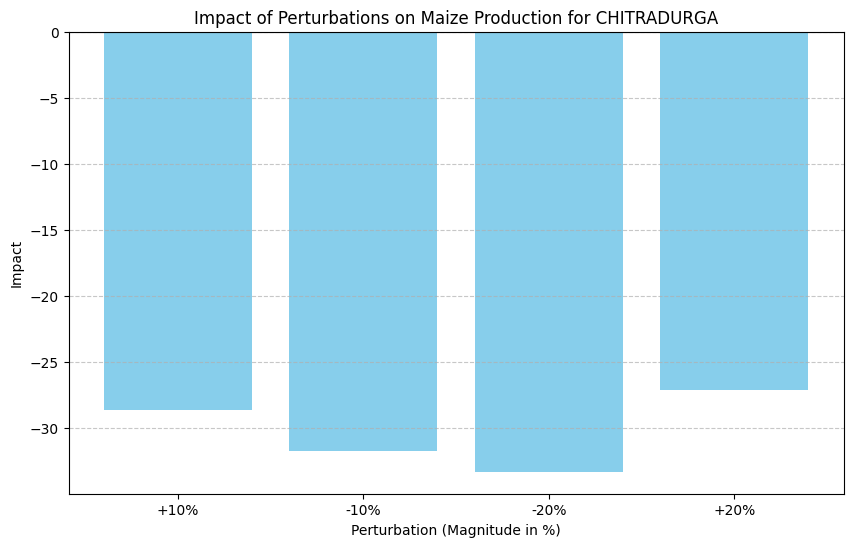

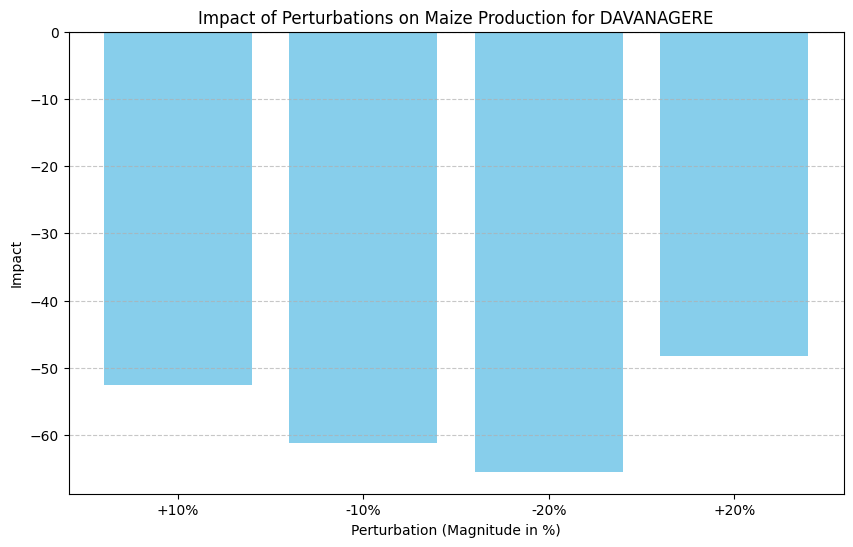

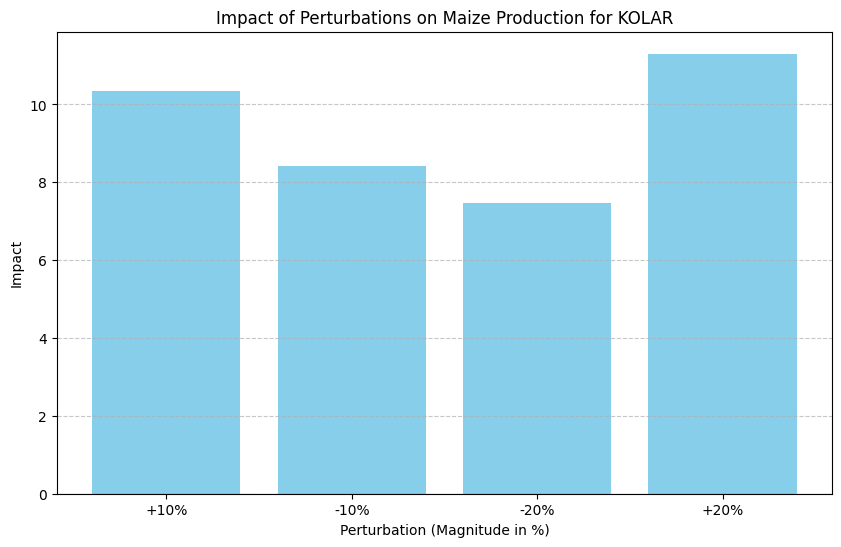

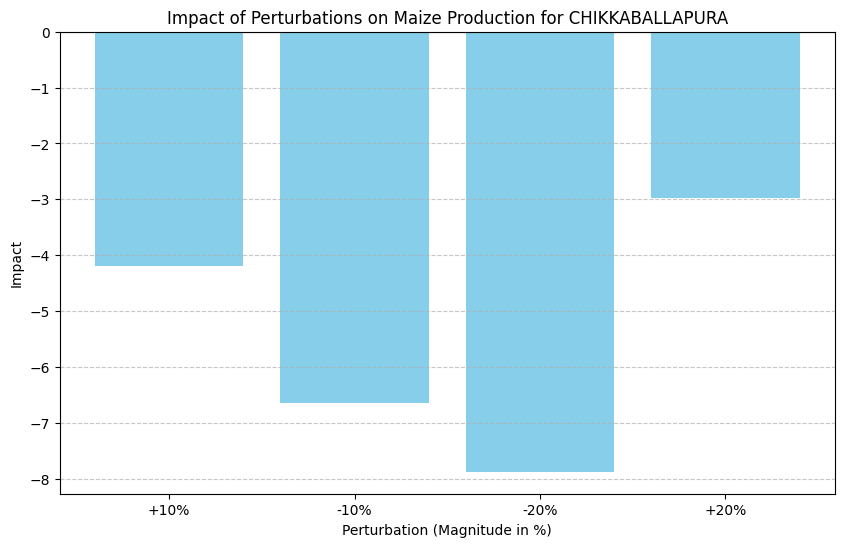

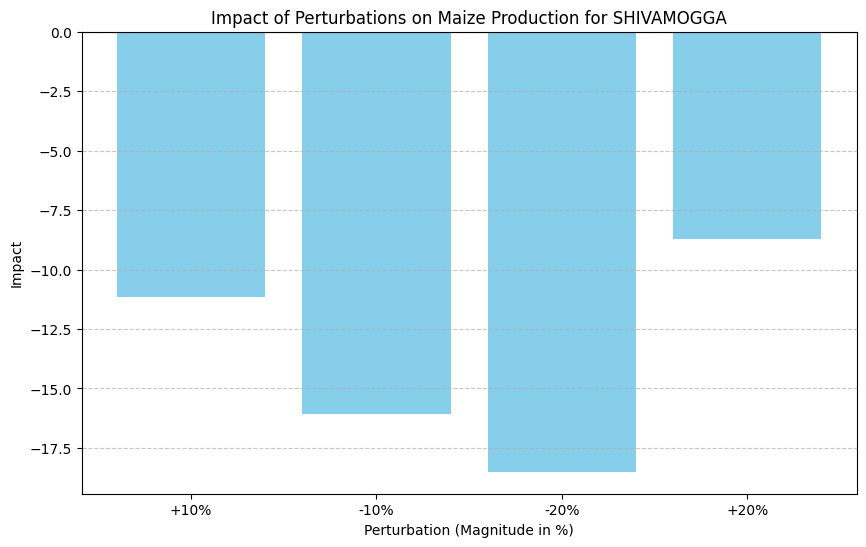

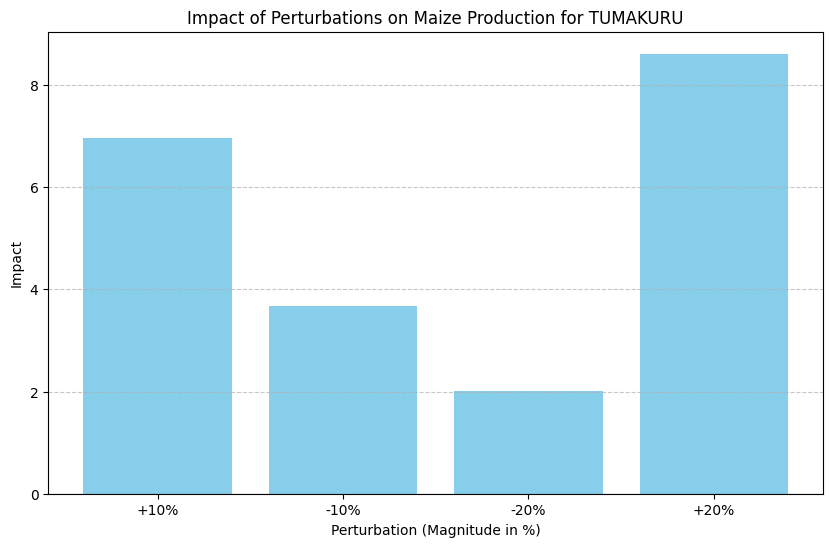

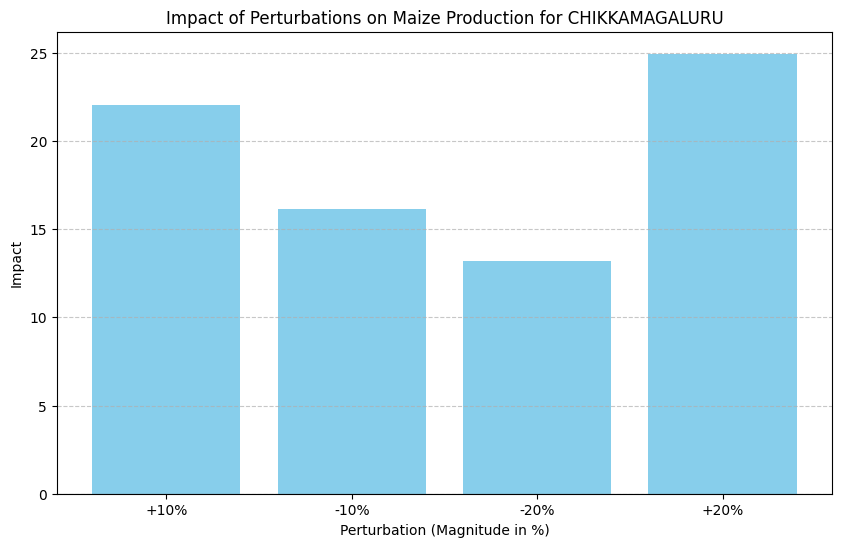

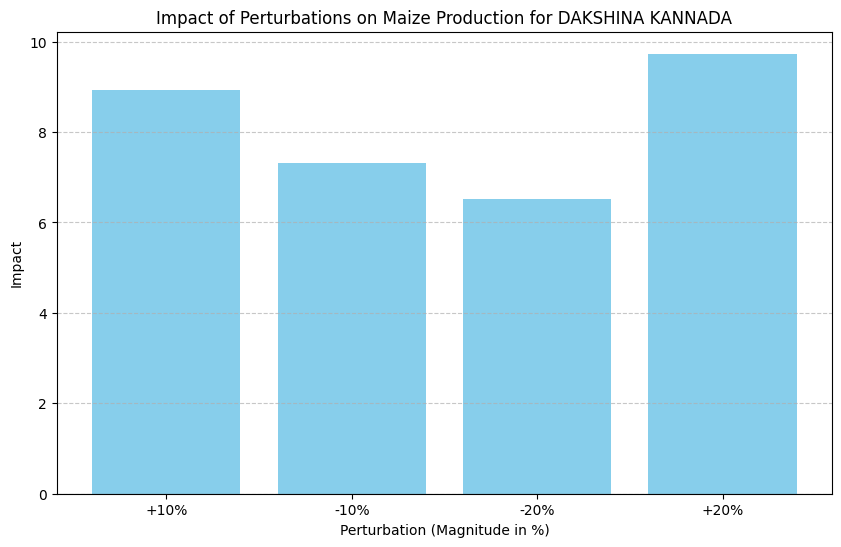

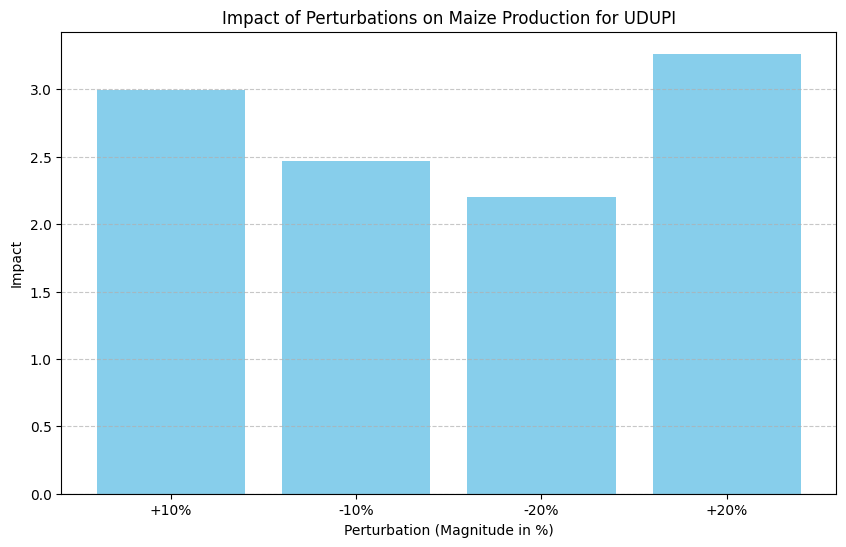

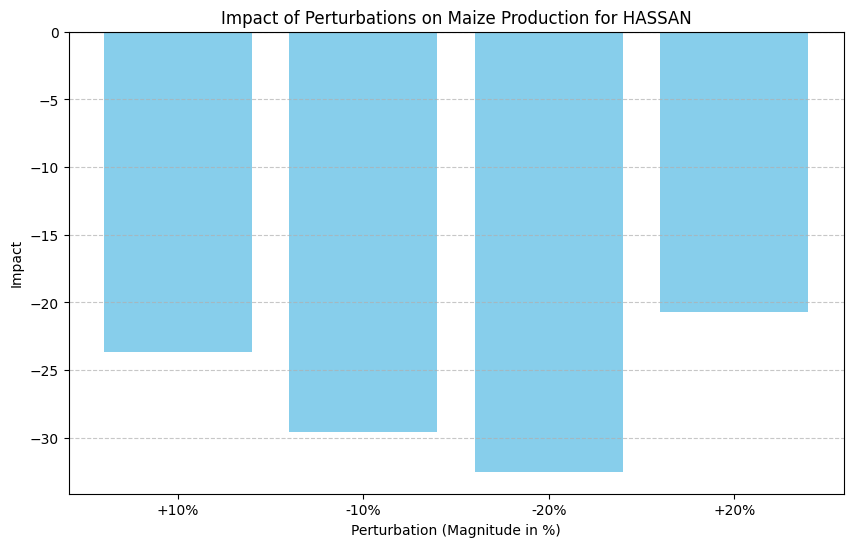

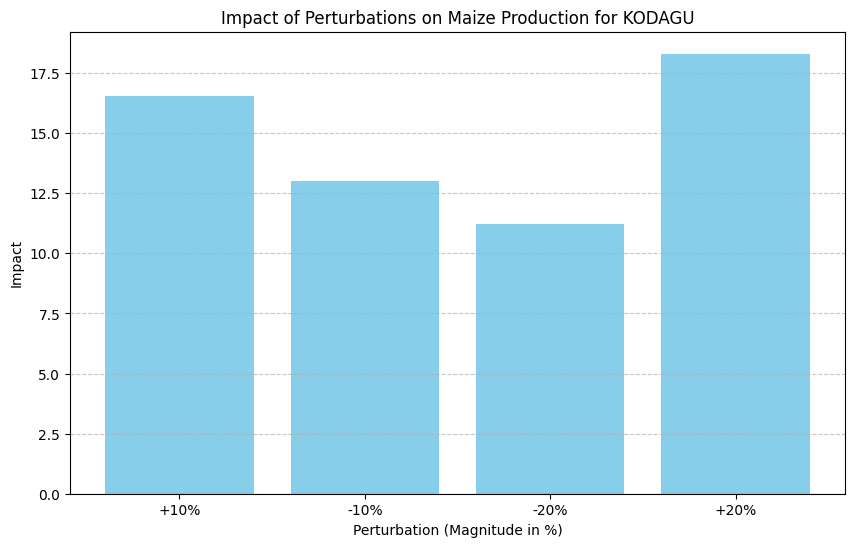

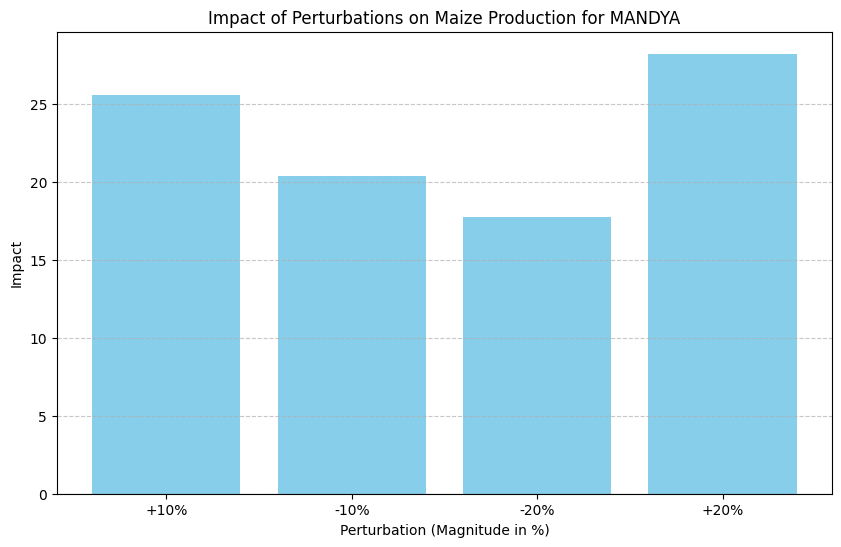

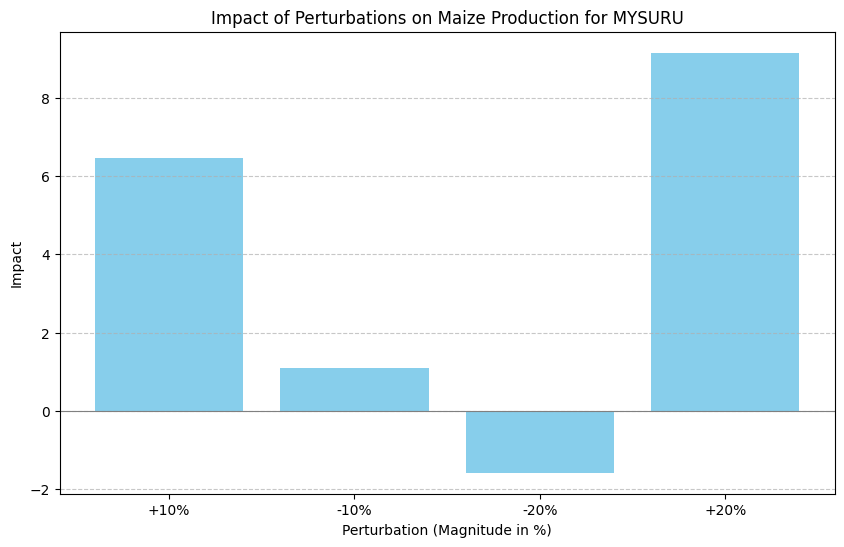

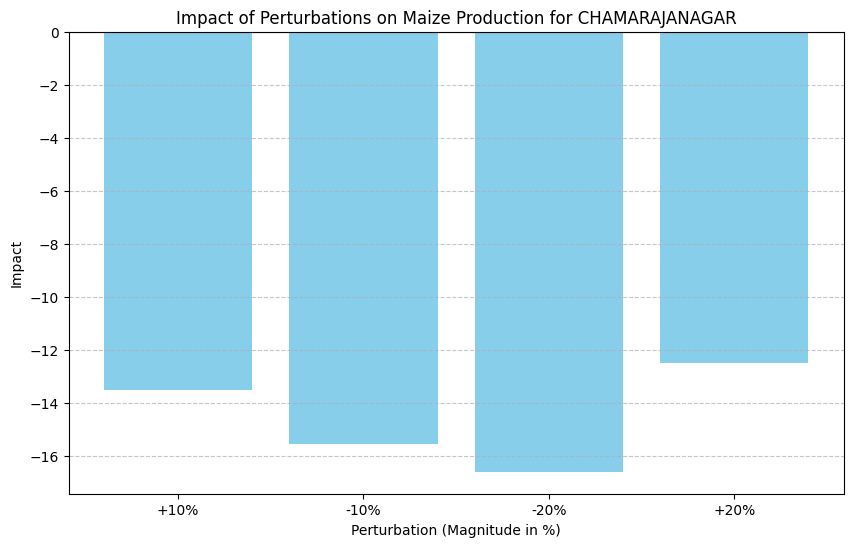

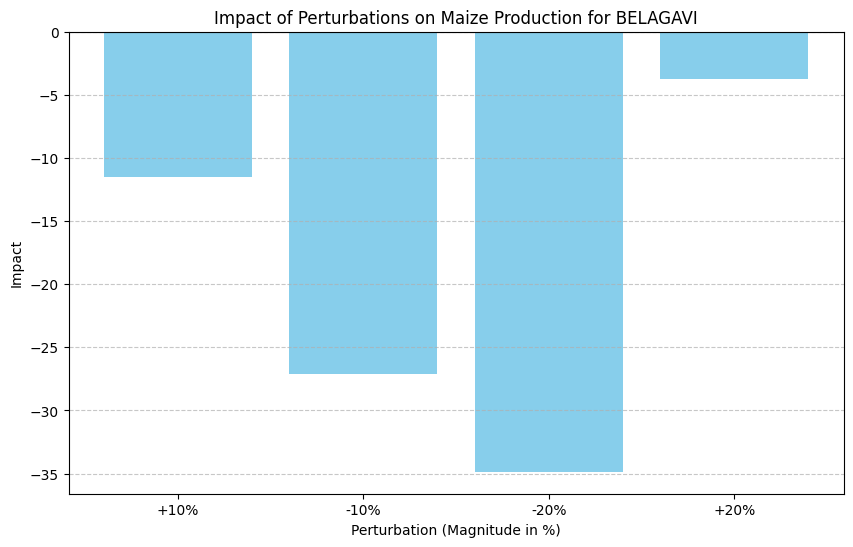

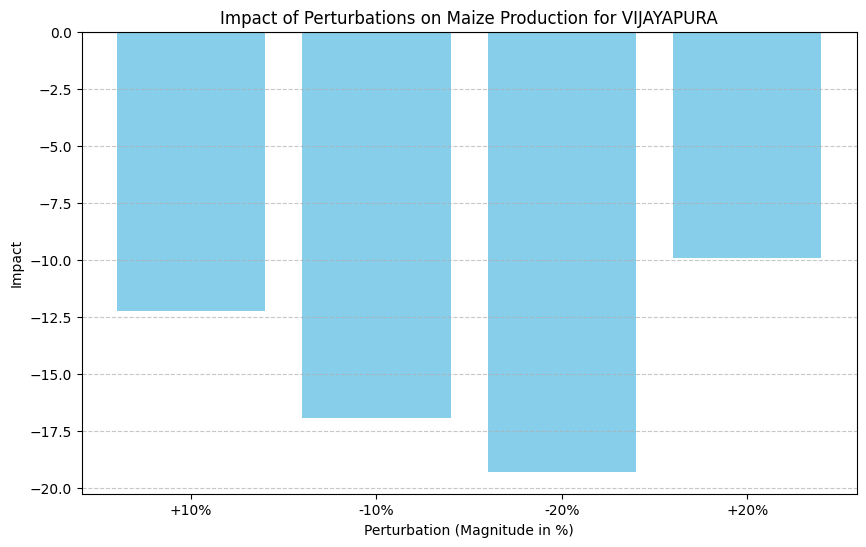

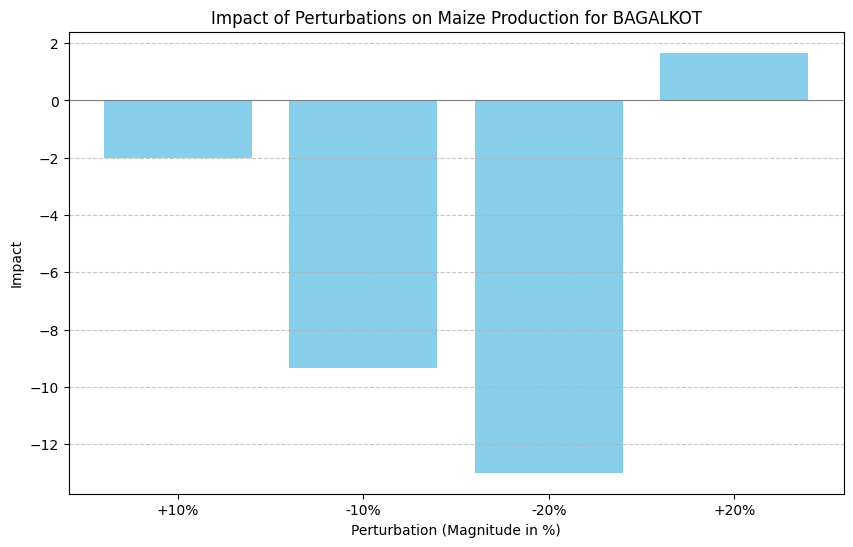

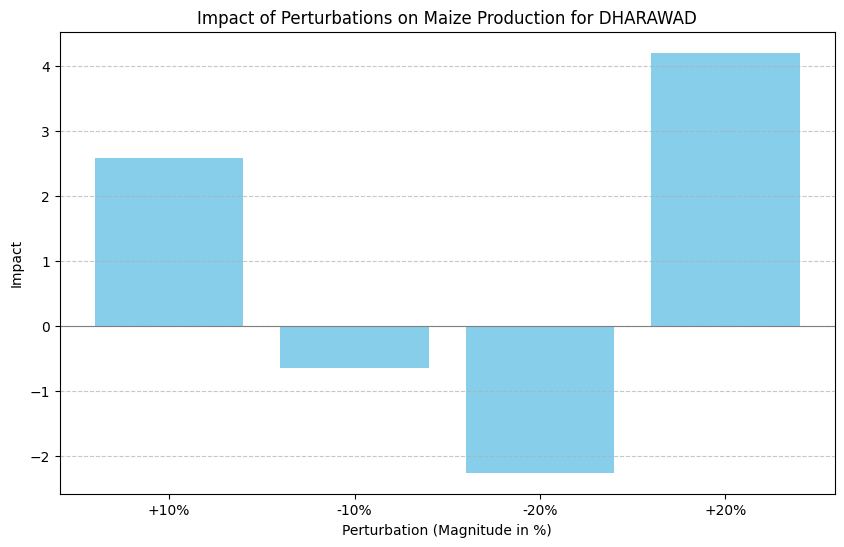

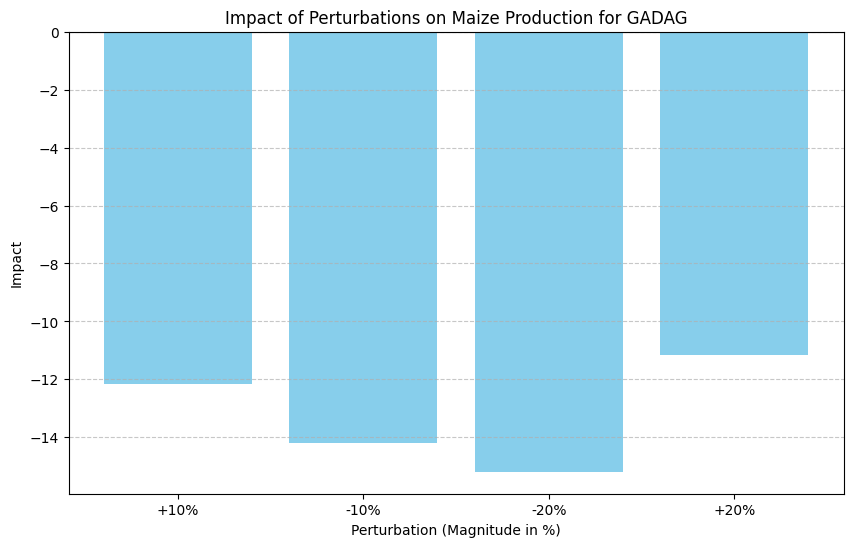

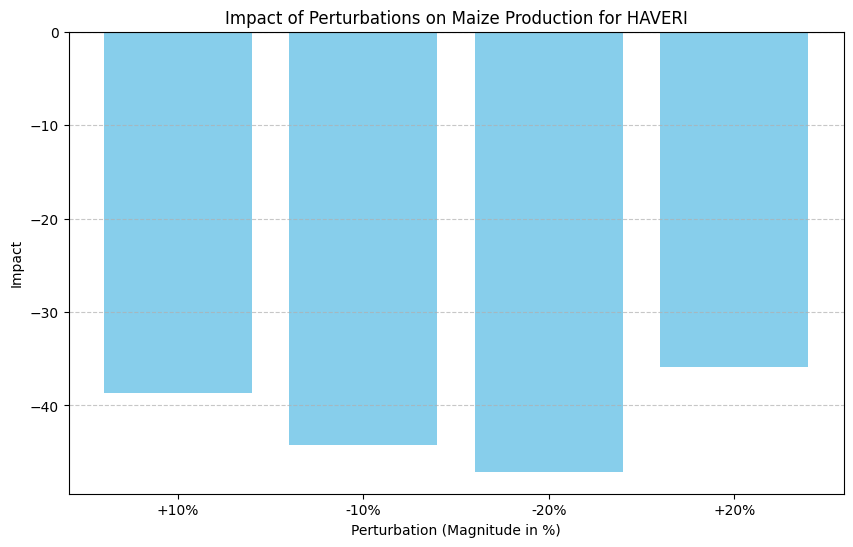

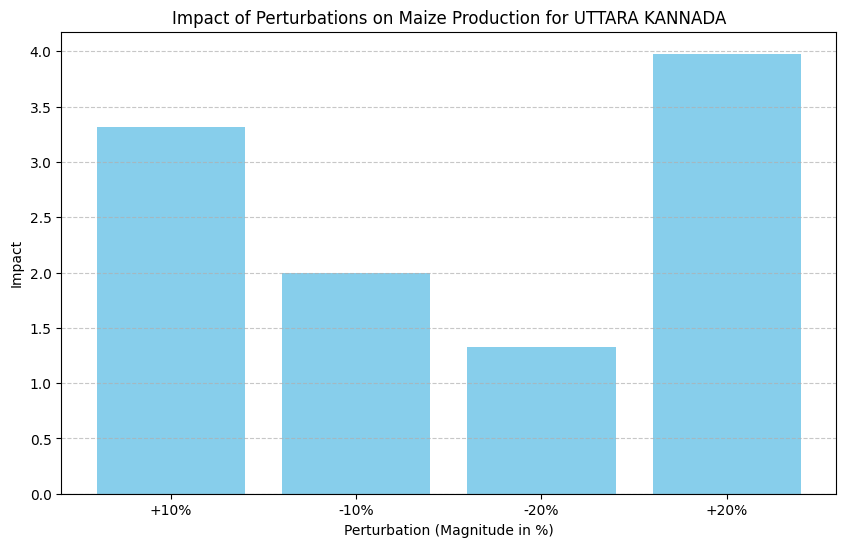

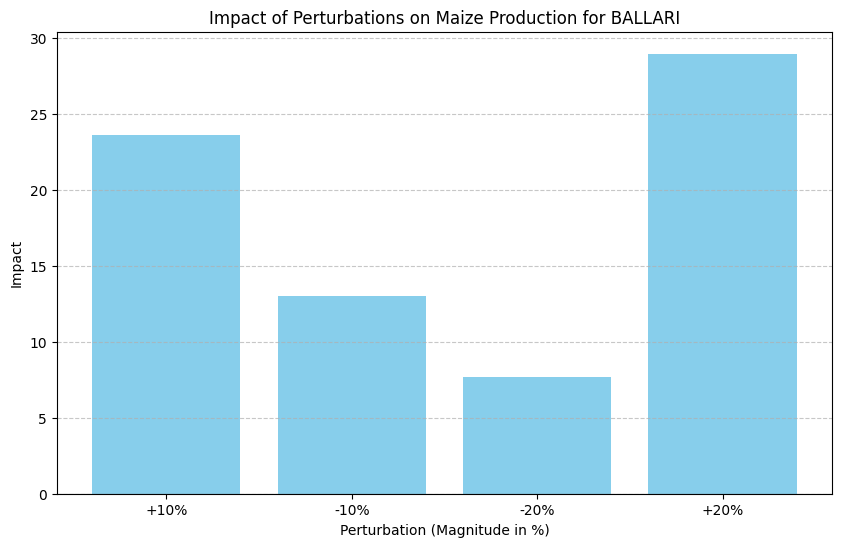

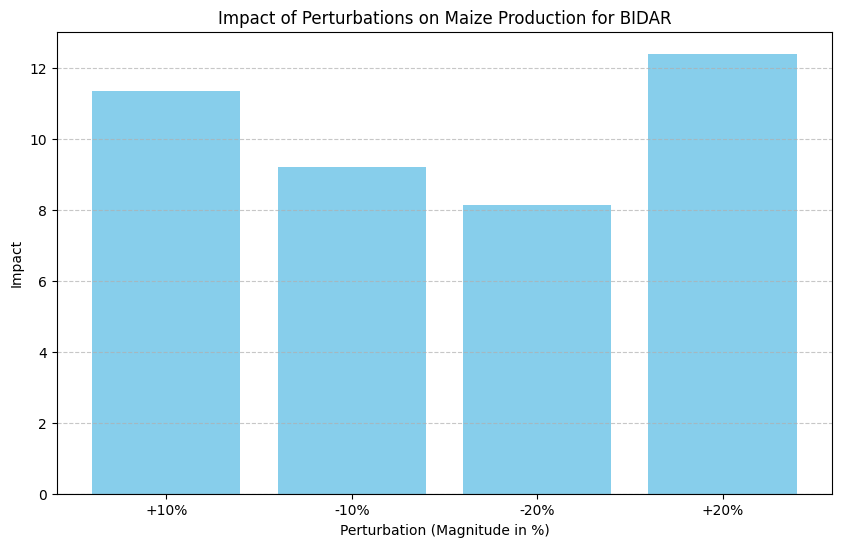

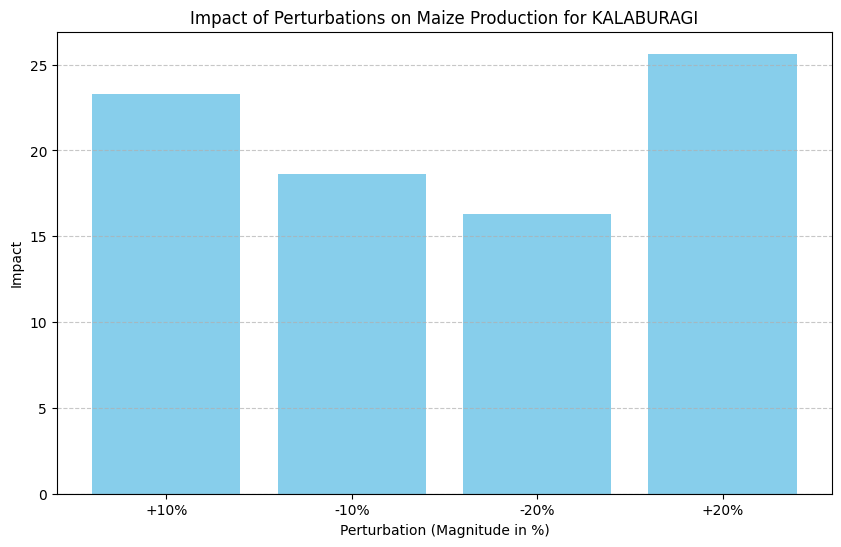

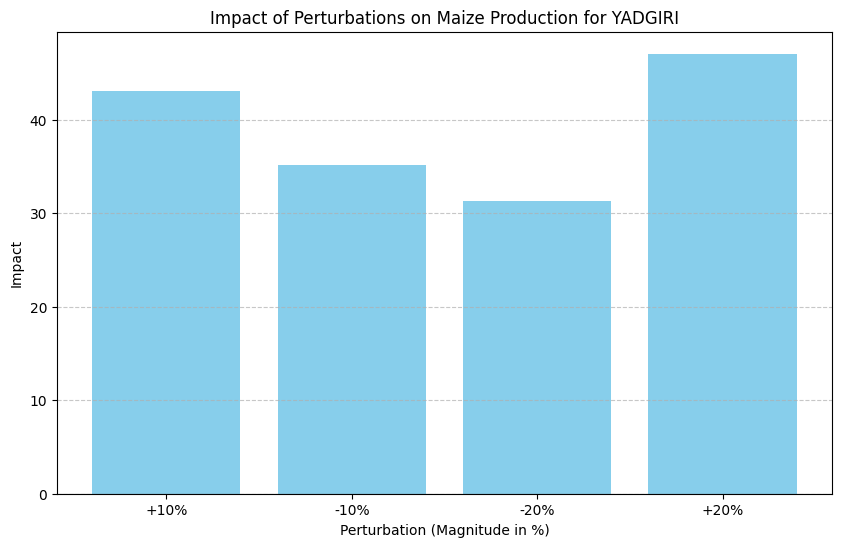

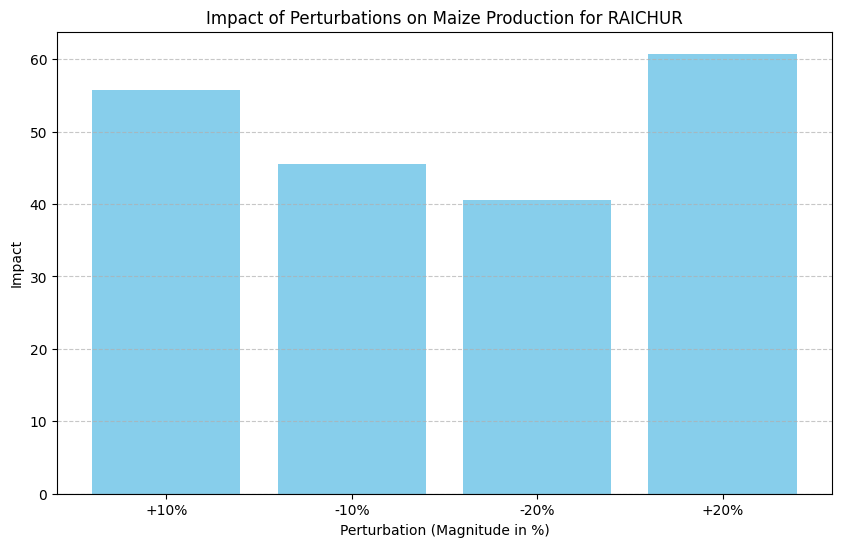

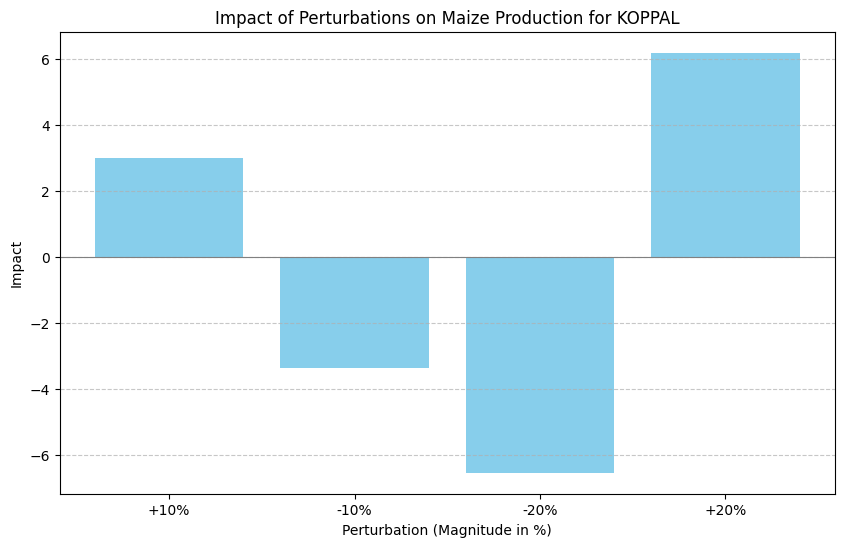

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['Maize_Production']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [10, -10, -20, 20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'Maize_Production'
maize_production_min = y.min()
maize_production_max = y.max()

# Loop through each unique district in the dataset
for district in data['District'].unique():
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    maize_production_old = data.loc[data['District'] == district, 'Maize_Production'].iloc[0]
    normalized_old = (maize_production_old - maize_production_min) / (maize_production_max - maize_production_min)

    impacts = []

    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        maize_production_new = m * perturbed_totalnpk + c
        normalized_new = (maize_production_new - maize_production_min) / (maize_production_max - maize_production_min)
        impact = (normalized_new - normalized_old) * 100  # Impact calculation
        impacts.append(impact)

    # Plotting the impacts of each perturbation
    plt.figure(figsize=(10, 6))
    plt.bar([f'{p*100:+.0f}%' for p in perturbations_corrected], impacts, color='skyblue')
    plt.xlabel('Perturbation (Magnitude in %)')
    plt.ylabel('Impact')
    plt.title(f'Impact of Perturbations on Maize Production for {district}')
    plt.axhline(0, color='gray', linewidth=0.8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['Maize_Production']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [10, -10, -20, 20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'Maize_Production'
maize_production_min = y.min()
maize_production_max = y.max()

# Initialize an empty list to store results for each district
district_results = []

# Loop through each unique district in the dataset
for district in data['District'].unique():
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    maize_production_old = data.loc[data['District'] == district, 'Maize_Production'].iloc[0]
    normalized_old = (maize_production_old - maize_production_min) / (maize_production_max - maize_production_min)

    positive_impacts = []
    negative_impacts = []

    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        maize_production_new = m * perturbed_totalnpk + c
        normalized_new = (maize_production_new - maize_production_min) / (maize_production_max - maize_production_min)
        impact = (normalized_new - normalized_old) * 100  # Impact calculation

        if impact > 0:
            positive_impacts.append((impact, p))
        elif impact < 0:
            negative_impacts.append((impact, p))

    # Choose perturbation based on conditions
    if positive_impacts and not negative_impacts:
        chosen_perturbation = max(positive_impacts)[1]
    elif not positive_impacts and negative_impacts:
        chosen_perturbation = min(negative_impacts)[1]
    elif positive_impacts and negative_impacts:
        chosen_perturbation = max(positive_impacts)[1]

    district_results.append({
        'District': district,
        'Perturbation_Choosen': f'P{user_perturbations.index(chosen_perturbation*100)+1}'
    })

# Convert the results into a DataFrame and display
results_df = pd.DataFrame(district_results)
print(results_df)


            District Perturbation_Choosen
0          BENGALURU                   P4
1       BENGALURU(R)                   P4
2         RAMANAGARA                   P4
3        CHITRADURGA                   P3
4         DAVANAGERE                   P3
5              KOLAR                   P4
6    CHIKKABALLAPURA                   P3
7         SHIVAMOGGA                   P3
8           TUMAKURU                   P4
9     CHIKKAMAGALURU                   P4
10  DAKSHINA KANNADA                   P4
11             UDUPI                   P4
12            HASSAN                   P3
13            KODAGU                   P4
14            MANDYA                   P4
15            MYSURU                   P4
16    CHAMARAJANAGAR                   P3
17          BELAGAVI                   P3
18        VIJAYAPURA                   P3
19          BAGALKOT                   P4
20          DHARAWAD                   P4
21             GADAG                   P3
22            HAVERI              